<a href="https://colab.research.google.com/github/yenlung/Python-AI-Book/blob/main/%E5%86%92%E9%9A%AA32_%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF%E7%9A%84%E5%8F%A6%E4%B8%80%E5%80%8B%E6%89%93%E9%80%A0%E6%96%B9%E5%BC%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<p align="center">
  <img src="https://storage.googleapis.com/kaggle-competitions/kaggle/3649/media/cifar-10.png"
  />
  <center>Cifar 10 資料庫</center>
  <center>圖片來源: https://www.kaggle.com/</center>
</p>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img

### 1. 讀入CIFAR--10資料集並進行資料預處理

CIFAR 10 是包含 10 種類的彩色小圖資料集，每張圖的尺寸為 $32\times32$

10 個類別分別是：飛機、交通工具、鳥、貓、鹿、狗、青蛙、馬、船、卡車

讀取 CIFAR 10 資料集

In [ ]:
class_name = ['飛機', '汽車', '鳥', '貓', '鹿', '狗', '青蛙', '馬', '船', '卡車']

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train/255
x_test = x_test/255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

這是青蛙


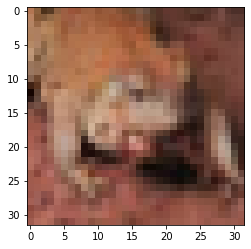

In [ ]:
plt.imshow(x_test[5])
print(f"這是{class_name[y_test[5].argmax()]}");

In [ ]:
y_test[5].flatten()

(10000, 1)

In [ ]:
x_train = x_train/255
x_test = x_test/255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### 2. 第一代：過去標準逐層打造神經網路的方法

在這個部分，我們將逐步帶領大家建立經典的 CNN 模型 LeNet-5 的變形。

LeNet-5 分成兩個部分，分別為卷積層與全連接層，兩部份之間是透過扁平層 (Flatten) ，將卷積層最後輸出的 2 維向量壓扁成 1 維向量。

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu')) 
model.add(MaxPool2D())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu')) 
model.add(MaxPool2D())
model.add(Conv2D(512, (3, 3), padding='same', activation='relu')) 
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
___________________________________________________________________________
 Layer (type)                    Output Shape                  Param #     
 conv2d (Conv2D)                 (None, 32, 32, 32)            896         
                                                                           
 max_pooling2d (MaxPooling2D)    (None, 16, 16, 32)            0           
                                                                           
 conv2d_1 (Conv2D)               (None, 16, 16, 128)           36992       
                                                                           
 max_pooling2d_1 (MaxPooling2D)  (None, 8, 8, 128)             0           
                                                                           
 conv2d_2 (Conv2D)               (None, 8, 8, 512)             590336      
                                                                           
 max_pooling2d_2 (MaxPooling2D)  (None, 4, 4, 512)             0    

#### 編譯模型: 設定模型訓練時的設定

- Optimizer: Stochastic Gradient Descent (SGD)
- Loss: categorical cross-entropy 

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(),
              metrics=['accuracy'])

#### 訓練模型: 透過訓練來學習分類資料的函數

In [ ]:
model.fit(x_train, y_train, 
          batch_size=128, 
          epochs=3,
          validation_data=(x_test, y_test)
          )

Epoch 1/3
391/391 [==============================] - 26s 38ms/step - loss: 1.4611 - accuracy: 0.4717 - val_loss: 1.1093 - val_accuracy: 0.6097
Epoch 2/3
391/391 [==============================] - 14s 36ms/step - loss: 0.9935 - accuracy: 0.6487 - val_loss: 1.0079 - val_accuracy: 0.6478
Epoch 3/3
391/391 [==============================] - 14s 36ms/step - loss: 0.8006 - accuracy: 0.7194 - val_loss: 0.7835 - val_accuracy: 0.7292


#### 模型預測: 預測資料集的準確率

In [ ]:
score_train = model.evaluate(x_train, y_train)
score_test = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.7835 - accuracy: 0.7292


In [ ]:
print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

Train Accuracy: 77.97799706459045
Test Accuracy: 72.9200005531311


## 3. 第二代：用串列將神經網路層一次放進模型中

In [ ]:
many_layers = [Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu'), 
         MaxPool2D(), 
         Conv2D(128, (3, 3), padding='same', activation='relu'), 
         MaxPool2D(), 
         Conv2D(512, (3, 3), padding='same', activation='relu'), 
         MaxPool2D(),
         Flatten(), 
         Dense(256, activation='relu'), 
         Dense(10, activation='softmax'), 
         ]

In [ ]:
second_model = Sequential(many_layers)

In [ ]:
second_model.summary()

Model: "sequential_1"
___________________________________________________________________________
 Layer (type)                    Output Shape                  Param #     
 conv2d_3 (Conv2D)               (None, 32, 32, 32)            896         
                                                                           
 max_pooling2d_3 (MaxPooling2D)  (None, 16, 16, 32)            0           
                                                                           
 conv2d_4 (Conv2D)               (None, 16, 16, 128)           36992       
                                                                           
 max_pooling2d_4 (MaxPooling2D)  (None, 8, 8, 128)             0           
                                                                           
 conv2d_5 (Conv2D)               (None, 8, 8, 512)             590336      
                                                                           
 max_pooling2d_5 (MaxPooling2D)  (None, 4, 4, 512)             0  

## 4. 第三代：用兩個串列定義神經網路，再一次放進模型中

In [ ]:
CNN_layers = [Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same',activation='relu'), 
              MaxPool2D(), 
              Conv2D(128, (3, 3), padding='same', activation='relu'), 
              MaxPool2D(), 
              Conv2D(512, (3, 3), padding='same', activation='relu'), 
              MaxPool2D(), 
              Flatten(), 
              ]

In [ ]:
FC_layers = [Dense(units=256, activation='relu'), 
             Dense(units=10, activation='softmax'), 
             ]

In [ ]:
third_model = Sequential(CNN_layers+FC_layers)

In [ ]:
third_model.summary()

Model: "sequential_2"
___________________________________________________________________________
 Layer (type)                    Output Shape                  Param #     
 conv2d_6 (Conv2D)               (None, 32, 32, 32)            896         
                                                                           
 max_pooling2d_6 (MaxPooling2D)  (None, 16, 16, 32)            0           
                                                                           
 conv2d_7 (Conv2D)               (None, 16, 16, 128)           36992       
                                                                           
 max_pooling2d_7 (MaxPooling2D)  (None, 8, 8, 128)             0           
                                                                           
 conv2d_8 (Conv2D)               (None, 8, 8, 512)             590336      
                                                                           
 max_pooling2d_8 (MaxPooling2D)  (None, 4, 4, 512)             0  

### 5. 第四代：可以方便修改部份神經網路，不會動到別人！

In [ ]:
new_FC_layers = [Dense(1024, activation='relu'), 
                 Dense(128, activation='relu'), 
                 Dense(10, activation='softmax'), 
                 ]


In [ ]:
fourth_model = Sequential(CNN_layers+new_FC_layers)

In [ ]:
fourth_model.summary()

Model: "sequential_3"
___________________________________________________________________________
 Layer (type)                    Output Shape                  Param #     
 conv2d_6 (Conv2D)               (None, 32, 32, 32)            896         
                                                                           
 max_pooling2d_6 (MaxPooling2D)  (None, 16, 16, 32)            0           
                                                                           
 conv2d_7 (Conv2D)               (None, 16, 16, 128)           36992       
                                                                           
 max_pooling2d_7 (MaxPooling2D)  (None, 8, 8, 128)             0           
                                                                           
 conv2d_8 (Conv2D)               (None, 8, 8, 512)             590336      
                                                                           
 max_pooling2d_8 (MaxPooling2D)  (None, 4, 4, 512)             0  